# Questão 5

A propriedade de ordenação topológica do algoritmo SOM pode ser usada para formar uma    representação    bidimensional    abstrata    de    um    espaço    de    entrada    de    alta dimensionalidade.  Para  investigar  esta  forma  de  representação,  considere uma  grade bidimensional consistindo de 10x10 neurônios que é treinada tendo como entrada os dados oriundos de quatro distribuições gaussianas, $C_1$, $C_2$, $C_3$, e $C_4$, em um espaço de entrada de dimensionalidade  igual  a  oito,  isto  é $x = (x_1, x_2, ..., x_8)^T$.  Todas as  nuvens  têm  variâncias unitária, mas centros ou vetores média diferentes dados por $m_1 = (0,0,0,0,0,0,0,0)^T$, $m_2 = (4,0,0,0,0,0,0,0)^T$, $m_3 = (0,0,0,4,0,0,0,0)^T$ e $m_4 = (0,0,0,0,0,0,0,4)^T$ . Calcule  o  mapa  produzido  pelo  algoritmo  SOM,  com  cada  neurônio  do  mapa  sendo rotulado com a classe particular mais representada pelos pontos de entrada em sua volta. O objetivo é visualizar os dados de dimensão 8 em um espaço de dimensão 2, constituído pela grade de neurônios.


In [62]:
from sklearn.datasets import make_blobs
import numpy as np

centers = [
    [ 0, 0, 0, 0, 0, 0, 0, 0 ],
    [ 4, 0, 0, 0, 0, 0, 0, 0 ],
    [ 0, 0, 0, 4, 0, 0, 0, 0 ],
    [ 0, 0, 0, 0, 0, 0, 0, 4 ]
]

data, y = make_blobs(n_samples=1000, centers=centers, n_features=8)

In [63]:
np.set_printoptions(precision=3)
print('Amostra do conjunto de dados\n\n', data[:5])

Amostra do conjunto de dados

 [[ 2.812  0.132  1.304  0.599  1.461  0.231 -0.784 -0.089]
 [-1.636 -1.384  1.529  3.18   0.422  0.033  0.742  0.102]
 [ 4.647 -0.388 -0.962  0.625 -1.647 -0.979  0.651  0.545]
 [-0.559 -0.509  1.025  3.755 -2.411  0.859 -1.812  0.569]
 [-0.741 -0.722 -0.203  1.495 -0.02   1.172  0.404  4.066]]


In [75]:
from minisom import MiniSom

som = MiniSom(
    10, 10, 8, 
    sigma=1.5, learning_rate=.7,
    activation_distance='euclidean', 
    topology='hexagonal', 
    neighborhood_function='gaussian'
)

som.train(data, 100, verbose=True)

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 2.355651301335407


In [76]:
xx, yy = som.get_euclidean_coordinates()
umatrix = som.distance_map()
weights = som.get_weights()

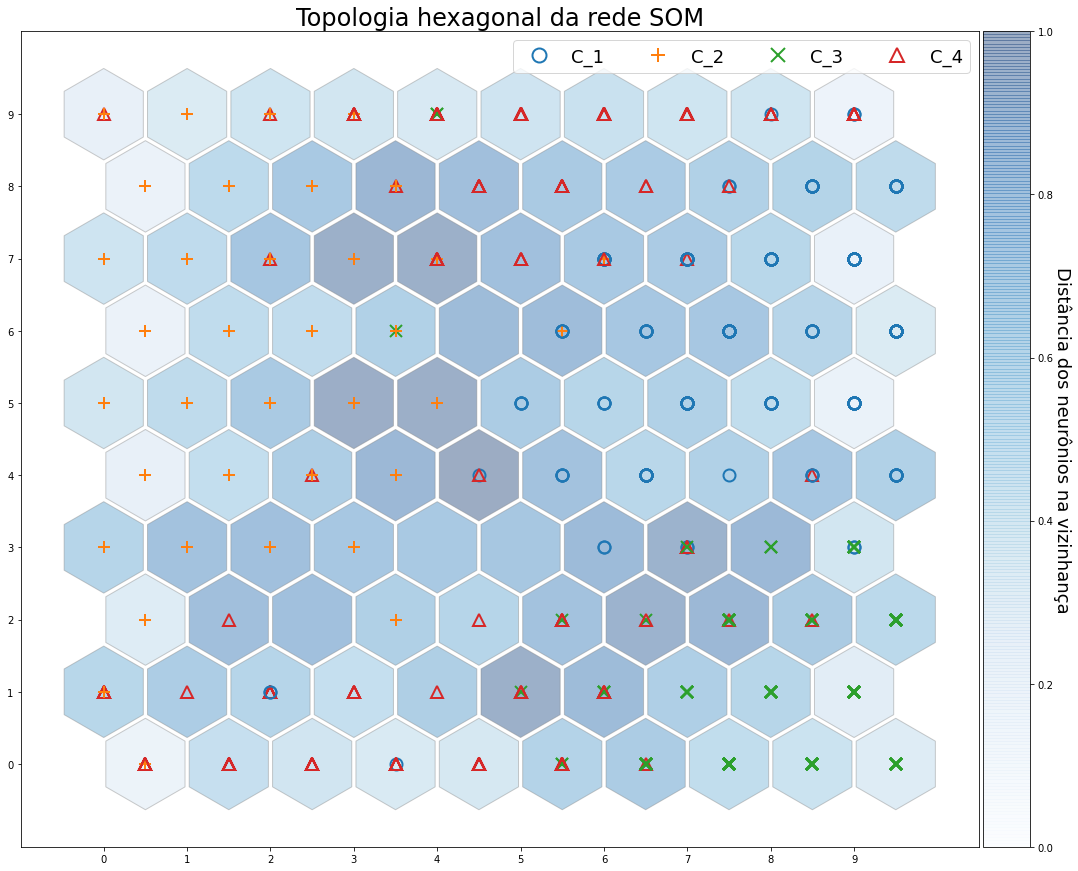

In [102]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import RegularPolygon
from matplotlib import pyplot as plt
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D

f = plt.figure(figsize=(22, 15))
ax = f.add_subplot(111)

ax.set_aspect('equal')

# iteratively add hexagons
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * 2 / np.sqrt(3) * 3 / 4
        hex = RegularPolygon(
            (xx[(i, j)], wy), 
            numVertices=6, 
            radius=.95 / np.sqrt(3),
            facecolor=cm.Blues(umatrix[i, j]), 
            alpha=.4, 
            edgecolor='gray'
        )
        ax.add_patch(hex)

markers = ['o', '+', 'x', '^']
colors = ['C0', 'C1', 'C2', 'C3']
for cnt, x in enumerate(data):
    # getting the winner
    w = som.winner(x)
    # place a marker on the winning position for the sample xx
    wx, wy = som.convert_map_to_euclidean(w) 
    wy = wy * 2 / np.sqrt(3) * 3 / 4
    plt.plot(
        wx, wy, 
        markers[y[cnt]-1], 
        markerfacecolor='None',
        markeredgecolor=colors[y[cnt]-1], 
        markersize=12, 
        markeredgewidth=2
    )

xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plt.xticks(xrange-.5, xrange)
plt.yticks(yrange * 2 / np.sqrt(3) * 3 / 4, yrange)

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues, orientation='vertical', alpha=.4)
cb1.ax.get_yaxis().labelpad = 18
cb1.ax.set_ylabel('Distância dos neurônios na vizinhança', rotation=270, fontsize=18)
plt.gcf().add_axes(ax_cb)

legend_elements = [
    Line2D([0], [0], marker='o', color='C0', label='C_1', markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
    Line2D([0], [0], marker='+', color='C1', label='C_2', markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
    Line2D([0], [0], marker='x', color='C2', label='C_3',markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
    Line2D([0], [0], marker='^', color='C3', label='C_4',markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2)
]

ax.set_title('Topologia hexagonal da rede SOM', fontsize=24)
ax.legend(handles=legend_elements, loc='upper right', ncol=4, fontsize=18)

#plt.tight_layout()
plt.show()